In [1]:
import pandas as pd
import os

# read in df
fn = 'working_cats/data/breeds_data_final.pkl'
breeds = pd.read_pickle(fn)
breeds

,age,gender,size,coat,breed,image
260,3.0,1.0,2.0,3.0,1.0,American Bobtail/46407834_34198.jpg
261,3.0,1.0,2.0,3.0,1.0,American Bobtail/46407781_34210.jpg
264,0.0,0.0,2.0,3.0,1.0,American Bobtail/46330160_41521.jpg
266,1.0,1.0,1.0,1.0,1.0,American Bobtail/46289156_45141.jpg
267,3.0,0.0,3.0,3.0,1.0,American Bobtail/46194971_53315.jpg
...,...,...,...,...,...,...
67139,1.0,0.0,2.0,3.0,65.0,Tuxedo/43784347_7292.jpg
67140,1.0,1.0,2.0,3.0,65.0,Tuxedo/43781057_7295.jpg
67141,0.0,0.0,2.0,3.0,65.0,Tuxedo/43773439_7304.jpg
67142,3.0,0.0,1.0,3.0,65.0,Tuxedo/43773383_7305.jpg


In [2]:
# clean up data
#breeds.where(breeds['image'] == 'Torbie/None')
print('BEFORE CLEAN')
br = breeds['image'].str.contains('None')
print(br.value_counts())

indexnames = br[ br == True].index
breeds.drop(indexnames, inplace=True)

print('\nAFTER CLEAN')
br = breeds['image'].str.contains('None')
print(br.value_counts())

BEFORE CLEAN
False    37794
True        13
Name: image, dtype: int64

AFTER CLEAN
False    37794
Name: image, dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# split into train, val, test sets
train, val, test = np.split(breeds.sample(frac=1, random_state=42),\
                            [int(.6*len(breeds)), int(.8*len(breeds))])

print("Train shape: "+str(train.shape))
print("val shape: "+str(val.shape))
print("test shape: "+str(test.shape))
# sets into x and y values
# x_train is image data
x_train = np.array(train.iloc[:,5])
y_train = np.array(train.iloc[:,4])
print('\nx_train[2]: '+str(x_train[2]))
print('y_train[2]: '+str(y_train[2]))

x_test = np.array(test.iloc[:,5])
y_test = np.array(test.iloc[:,4])
print('\nx_test[2]: '+str(x_test[2]))
print('y_test[2]: '+str(y_test[2]))

x_val = np.array(val.iloc[:,5])
y_val = np.array(val.iloc[:,4])
print('\nx_val[2]: '+str(x_val[2]))
print('y_val[2]: '+str(y_val[2]))

print('\nx_train shape: '+str(x_train.shape))
print('y_train shape: '+str(y_train.shape))

Train shape: (22676, 6)
val shape: (7559, 6)
test shape: (7559, 6)

x_train[2]: Manx/24698761_7126.jpg
y_train[2]: 36.0

x_test[2]: Tiger/42157409_5044.jpg
y_test[2]: 59.0

x_val[2]: Tiger/45203452_1522.jpg
y_val[2]: 59.0

x_train shape: (22676,)
y_train shape: (22676,)



Number of breeds: 26


C:\Users\devon\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[[Text(0, 0, '1.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '7.0'),
  Text(3, 0, '9.0'),
  Text(4, 0, '13.0'),
  Text(5, 0, '21.0'),
  Text(6, 0, '22.0'),
  Text(7, 0, '23.0'),
  Text(8, 0, '24.0'),
  Text(9, 0, '25.0'),
  Text(10, 0, '28.0'),
  Text(11, 0, '30.0'),
  Text(12, 0, '35.0'),
  Text(13, 0, '36.0'),
  Text(14, 0, '44.0'),
  Text(15, 0, '47.0'),
  Text(16, 0, '48.0'),
  Text(17, 0, '51.0'),
  Text(18, 0, '55.0'),
  Text(19, 0, '58.0'),
  Text(20, 0, '59.0'),
  Text(21, 0, '61.0'),
  Text(22, 0, '62.0'),
  Text(23, 0, '63.0'),
  Text(24, 0, '64.0'),
  Text(25, 0, '65.0')]]

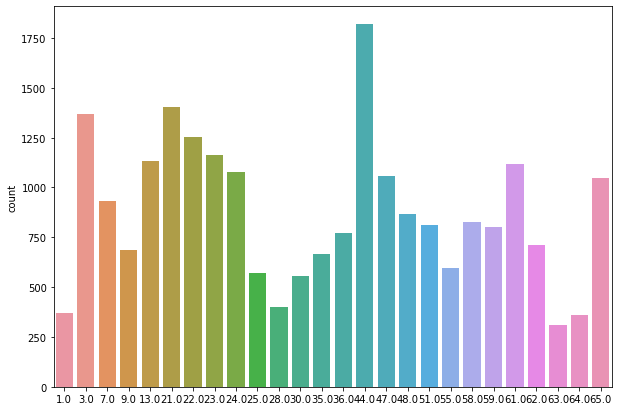

In [4]:
# number of breeds now
br = pd.unique(breeds['breed'])
num_breeds = len(br)
print('\nNumber of breeds: '+str(num_breeds))

plt.figure(figsize=(10,7))
p = sns.countplot(y_train.flatten())
p.set(xticklabels=br)

In [5]:
from PIL import Image
ar_size = 32

# resize func
def resize_img(im_path):
    # load image
    im = Image.open(im_path)
    # resize images
    im = im.resize((ar_size,ar_size))
    # convert to array
    im = np.asarray(im)
    im = im / 255.0
    return im

In [6]:
data_dir = '../../Datasets/cats/images/'
n_train = np.empty((x_train.shape[0], ar_size, ar_size, 3))
print(n_train.shape)

(22676, 32, 32, 3)


In [7]:
from tqdm import trange

#newim = resize_img(data_dir+x_train[2])
#plt.imshow(newim)
#print(newim.shape)

#n_train[0] = resize_img(data_dir+x_train[0])
#plt.imshow(n_train[0])
#print(n_train.shape)

# convert x_train to image arrays
for i in trange(x_train.shape[0]):
    n_train[i] = resize_img(data_dir+x_train[i])

100%|██████████| 22676/22676 [05:30<00:00, 68.57it/s]


100%|██████████| 7559/7559 [01:58<00:00, 63.89it/s]


(7559, 32, 32, 3)


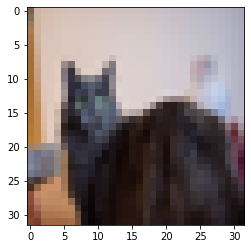

In [8]:
n_test = np.empty((x_test.shape[0], ar_size, ar_size, 3))
# convert x_test to image arrays
for i in trange(x_test.shape[0]):
    n_test[i] = resize_img(data_dir+x_test[i])
    
plt.imshow(n_test[0])
print(n_test.shape)

100%|██████████| 7559/7559 [02:05<00:00, 60.19it/s]


(7559, 32, 32, 3)


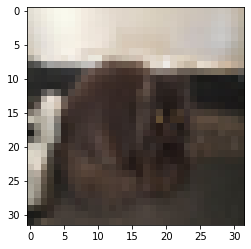

In [9]:
n_val = np.empty((x_val.shape[0], ar_size, ar_size, 3))
# convert x_val to image arrays
for i in trange(x_val.shape[0]):
    # some of the images have a shape (128,128,4), idky
    im = resize_img(data_dir+x_val[i])
    if (im.shape == n_val[i].shape):
        n_val[i] = im
    
plt.imshow(n_val[0])
print(n_val.shape)

(22676, 32, 32, 3)


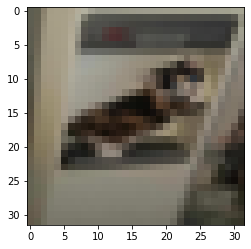

In [10]:
plt.imshow(n_train[0])
print(n_train.shape)

In [11]:
# save image arrays to file
n_train = n_train.astype('float32')
n_test = n_test.astype('float32')
n_val = n_val.astype('float32')

work_dir = 'working_cats/images/'
np.save(work_dir+'x_train.npy', n_train)
print('saved x_train.npy')
np.save(work_dir+'x_test.npy', n_test)
print('saved x_test.npy')
np.save(work_dir+'x_val.npy', n_val)
print('saved x_val.npy')

saved x_train.npy
saved x_test.npy
saved x_val.npy


In [12]:
import tensorflow as tf

y_train = tf.one_hot(y_train.astype(np.int32), depth=num_breeds)
y_test = tf.one_hot(y_test.astype(np.int32), depth=num_breeds)
y_val = tf.one_hot(y_val.astype(np.int32), depth=num_breeds)

np.save(work_dir+'y_train.npy', y_train)
print('saved y_train.npy')
np.save(work_dir+'y_test.npy', y_test)
print('saved y_test.npy')
np.save(work_dir+'y_val.npy', y_val)
print('saved y_val.npy')

saved y_train.npy
saved y_test.npy
saved y_val.npy


In [13]:


print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

print(x_val.shape)
print(y_val.shape)

(22676,)
(22676, 26)
(7559,)
(7559, 26)
(7559,)
(7559, 26)
